In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("fuentes.txt", sep = "\s+")
df["FECHA"] = pd.to_datetime(df.FECHA)

#Ahora determinaremos unos parámetros que nos serán útiles más adelante en el código.
df["Tprom"] = (df["TMAX"]+df["TMIN"])/2
df["Tdif"] = df["TMAX"] - df["TMIN"]

#Crearemos nuevas columnas asignadas a los meses y años.
df["MES"] = df["FECHA"].dt.month
df["AÑO"] = df["FECHA"].dt.year





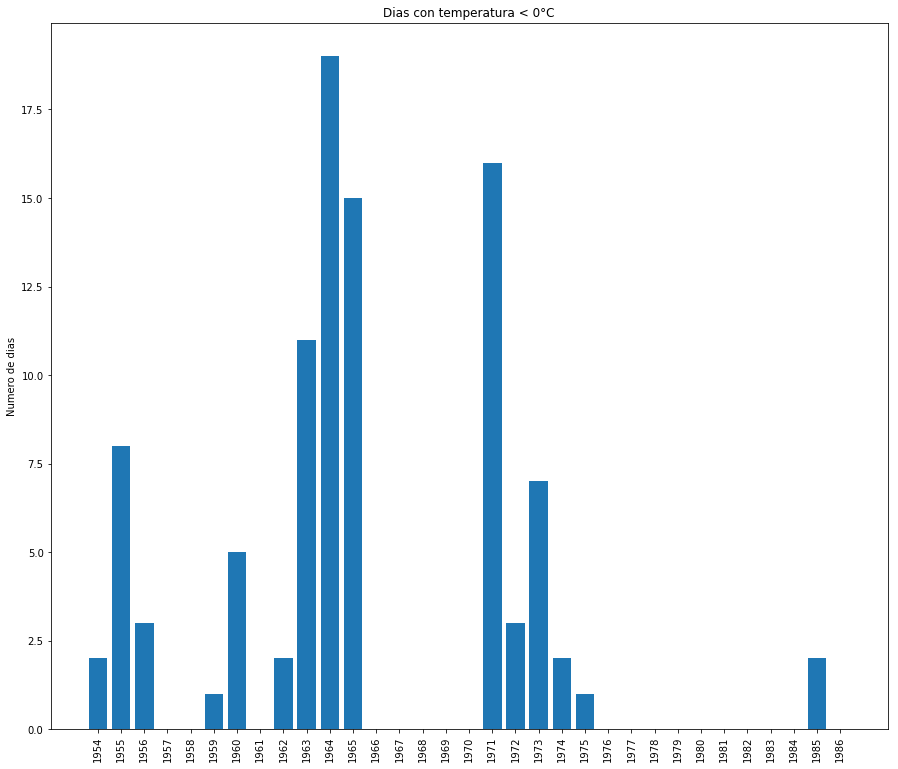

In [3]:
#Esta sección est´pa dedicada a contabilizar el número de heladas por cada año
FD = []
años = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["TMIN"][j] < 0):
            ndias = ndias+1
    FD.append(ndias)
    años.append(i)
    ndias = 0

#Ahora lo graficaremos.
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),FD)
plt.title("Dias con temperatura < 0°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.savefig("1")
plt.show()


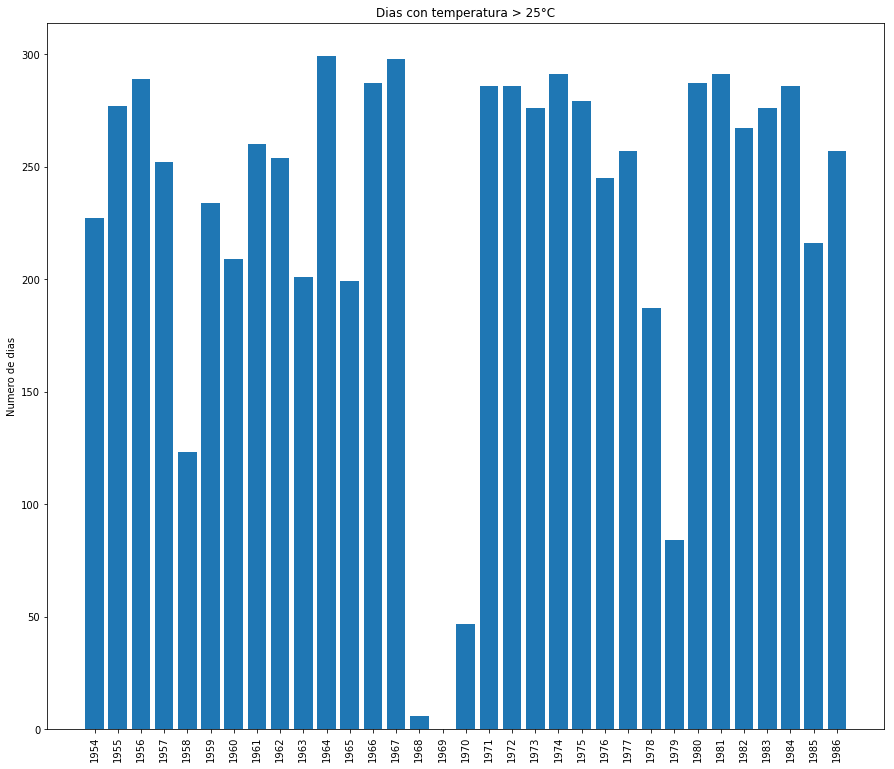

In [4]:
#Esta sección se encargará de contabilizar los días donde la temperatura máxima supera los 25 grados.
SU = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["TMAX"][j] > 25):
            ndias = ndias+1
    SU.append(ndias)
    ndias = 0
    
#Ahora graficaremos estos datos contabilizados.
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),SU)
plt.title("Dias con temperatura > 25°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.savefig("2")
plt.show()



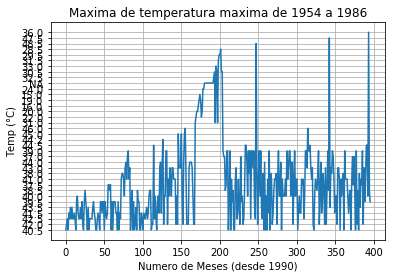

In [5]:
#Esta sección de código se encarga de encotrar los valores máximos y mínimos de una columna

def maxmensual(col,año1,año2):
    maximos = []
    maxi = -1000
    for n in range(año1,año2+1):
        for i in range(1,13):
            for j in range(0,len(df)):
                if(df["MES"][j] == i and df["AÑO"][j] == n and col[j]>maxi):
                        maxi = col[j]
            if(maxi != -1000):
                maximos.append(maxi)
                maxi = -1000
            else:
                maximos.append("NA")
    return maximos

def minmensual(col,año1,año2):
    minimos = []
    mini = 1000
    for n in range(año1,año2+1):
        for i in range(1,13):
            for j in range(0,len(df)):
                if(df["MES"][j] == i and df["AÑO"][j] == n and col[j]<mini):
                    mini = col[j]
            if(mini != 1000):
                minimos.append(mini)
                mini = 1000
            else:
                minimos.append("NA")
    return minimos

#Ahora procederemos a graficar las temperaturas máximas de cada mes.
TXx = maxmensual(df["TMAX"],1954,df["AÑO"][len(df)-1])

plt.plot(range(0,len(TXx)),TXx)
plt.title("Maxima de temperatura maxima de 1954 a 1986")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1990)")
plt.grid()
plt.savefig("3")
plt.show()



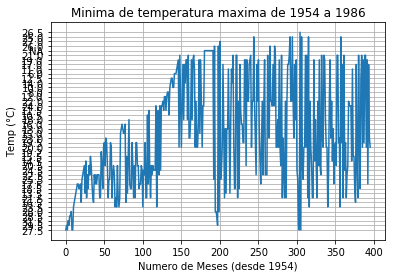

In [6]:
#Ahora con ayuda de las funciones en el bloque anterior, graficaremos las temperaturas mínimas
# mensuales por año.

#Obtiene la minima de la temperatura maxima por mes de cada año
TXn = minmensual(df["TMAX"],1954,df["AÑO"][len(df)-1])

plt.plot(range(0,len(TXn)),TXn)
plt.title("Minima de temperatura maxima de 1954 a 1986")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1954)")
plt.grid()
plt.savefig("10")
plt.show()


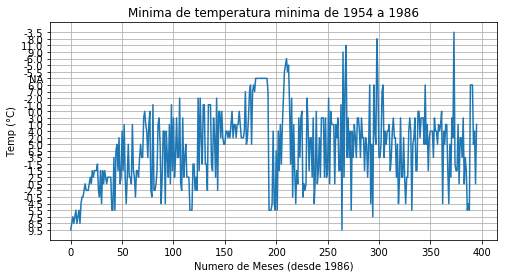

In [7]:
#Este bloque contabilizará las mínimas de la tabla de datos de temperatura máxima, gracias
# a las funciones que arriba están definidas.
TNn = minmensual(df["TMIN"],1954,df["AÑO"][len(df)-1])

plt.figure(figsize = (8, 4))
plt.plot(range(0,len(TNn)),TNn)
plt.title("Minima de temperatura minima de 1954 a 1986")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1986)")
plt.grid()
plt.show()



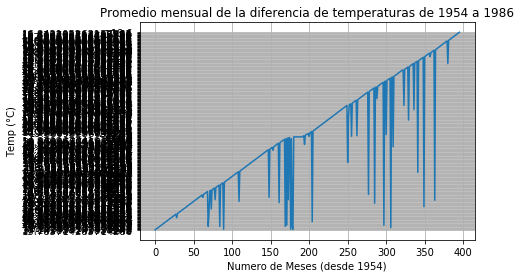

In [8]:
#Ahora caluclaremos el promedio mensual de la difrenecia de las temperaturas máximas y mínimas
#de cada mes.
DTR = []
k = 0
prom = 0
for n in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(1,13):
        for i in range(0,len(df)):
            if(df["MES"][i] == j and df["AÑO"][i] == n):
                prom = prom + df["Tdif"][i]
                k = k+1
        if(k != 0):
            prom = prom/k
            DTR.append(prom)
            prom = 0
            k = 0
        else:
            DTR.append("NA")

#Y procederemos a graficar estos datos.
plt.plot(range(0,len(DTR)),DTR)
plt.title("Promedio mensual de la diferencia de temperaturas de 1954 a 1986")
plt.ylabel("Temp (°C)")
plt.xlabel("Numero de Meses (desde 1954)")
plt.grid()
plt.show()

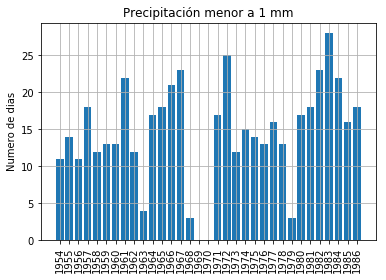

In [9]:
#Obtendremos el número de días en los que la precipitación no alcanzó 1 mm.
SDII = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["PRECIP"][j] >= 1):
            ndias = ndias+1
    SDII.append(ndias)
    ndias = 0

#Ahora procederemos a graficar estos datos.

plt.bar(np.arange(len(años)),SDII)
plt.title("Precipitación menor a 1 mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.show()

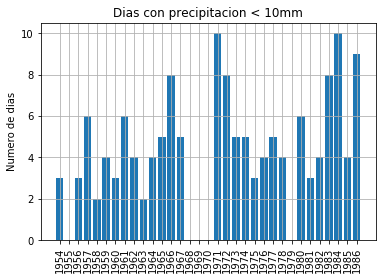

In [10]:
#De manera similar, obtendremos los días más lluviosos, donde la precipitación alcanzó los 10 mm
R10mm = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["PRECIP"][j] >= 10):
            ndias = ndias+1
    R10mm.append(ndias)
    ndias = 0
    
#Y procederemos a graficar estos datos.
plt.grid()
plt.bar(np.arange(len(años)),R10mm)
plt.title("Dias con precipitacion < 10mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.savefig("4")
plt.show()


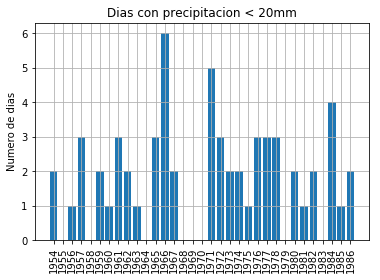

In [11]:
#Ahora el número de días donde la precipitación alcanzó los 20 mm.
R20mm = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["PRECIP"][j] >= 20):
            ndias = ndias+1
    R20mm.append(ndias)
    ndias = 0

#Ahora draficaremos estos datos como en los bloques anteriores.
plt.bar(np.arange(len(años)),R20mm)
plt.title("Dias con precipitacion < 20mm")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.savefig("5")
plt.show()


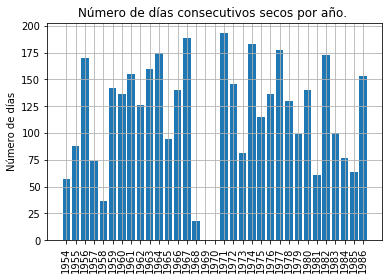

In [12]:
#Ahora procederemos a obtener la contabiliazación de los días mas secos durante los años
# que abarcan mi tabla de datos.
CDD = []
ndias = 0
temp = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i):
            if(df["PRECIP"][j]<1):
                temp = temp+1
            elif(df["PRECIP"][j]>=1):
                if(temp > ndias):
                    ndias = temp
                    temp = 0
                else:
                    temp = 0
    CDD.append(ndias)
    ndias = 0
    temp = 0
    
    
#PAra poder después, graficar estos datos.
plt.bar(np.arange(len(años)),CDD)
plt.title("Número de días consecutivos secos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.savefig("6")
plt.show()



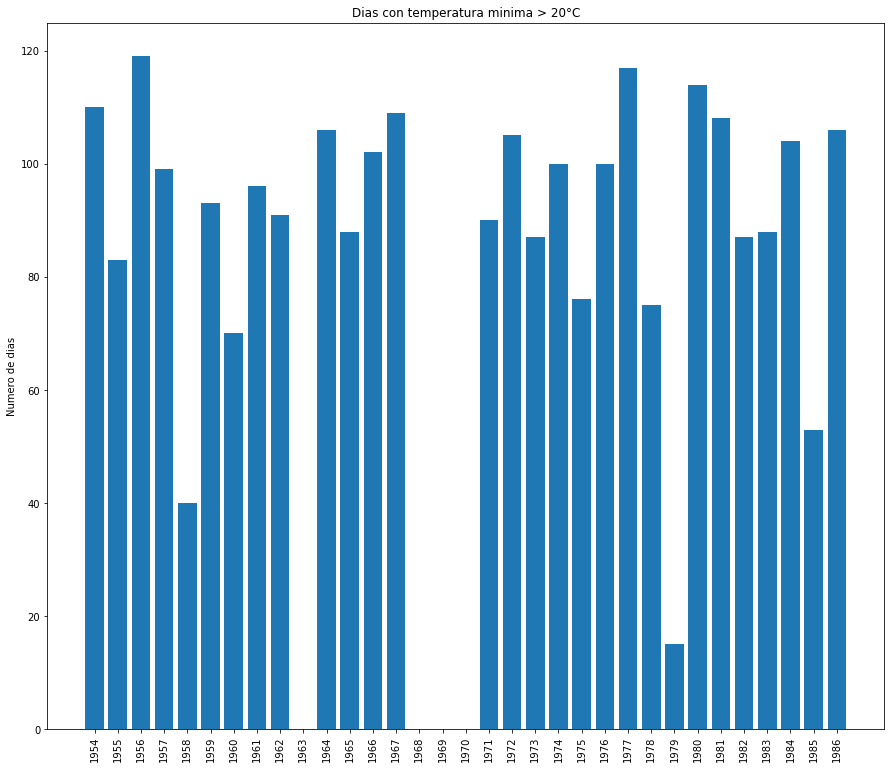

In [13]:
#Días con temperatura mínima mayor a 20.
TR = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["TMIN"][j] > 20):
            ndias = ndias+1
    TR.append(ndias)
    ndias = 0
    
#Ahora procederemos a graficasr estos datos.
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),TR)
plt.title("Dias con temperatura minima > 20°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.savefig("7")
plt.show()



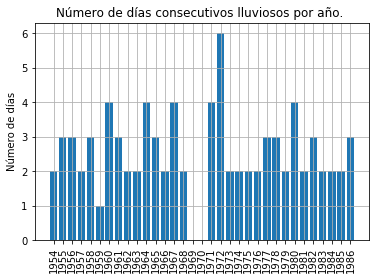

In [14]:
#Número de días húmedos consecutivos.
CWD = []
ndias = 0
temp = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i):
            if(df["PRECIP"][j]>= 1):
                temp = temp+1
            elif(df["PRECIP"][j] < 1):
                if(temp > ndias):
                    ndias = temp
                    temp = 0
                else:
                    temp = 0
    CWD.append(ndias)
    ndias = 0
    temp = 0

#Procederemos a graficar estos datos.

plt.bar(np.arange(len(años)),CWD)
plt.title("Número de días consecutivos lluviosos por año. ")
plt.ylabel("Número de días")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.grid()
plt.savefig("8")
plt.show()


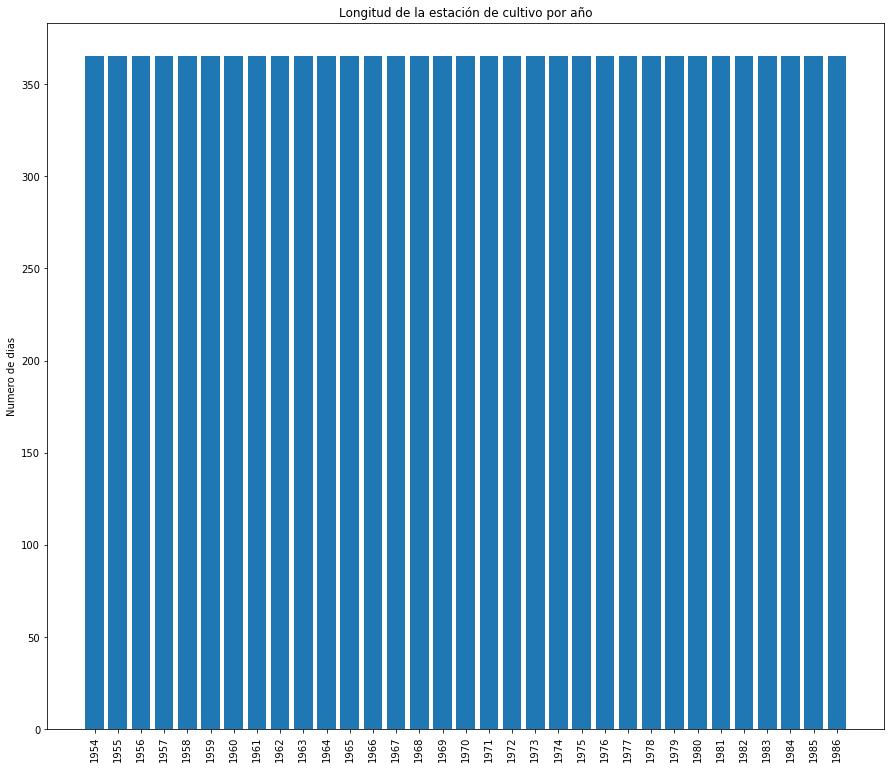

In [15]:
todosPrimeros = []
seisPrimeros = -1
for j in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    dfaño = df[df["AÑO"]==j]
    for i in dfaño.index:
            if(dfaño["Tprom"][i]   > 5 and dfaño["Tprom"][i+1] > 5 and dfaño["Tprom"][i+2] > 5 and
               dfaño["Tprom"][i+3] > 5 and dfaño["Tprom"][i+4] > 5 and dfaño["Tprom"][i+5] > 5):
                seisPrimeros = i
                break
    if(seisPrimeros != -1):
        todosPrimeros.append(seisPrimeros)
        seisPrimeros = -1
    else:
        todosPrimeros.append(None)
#####################################################################################
todosUltimos = []
seisUltimos = -1
for j in range(df["AÑO"][len(df)-1],df["AÑO"][0]-1,-1):
    dfaño = df[df["AÑO"]==j]
    indix = dfaño.index
    indix = indix[::-1]
    for i in range(0,len(indix)-5):
        if(df["AÑO"][i] == j):
            if(dfaño["Tprom"][indix[i]  ] < 5 and dfaño["Tprom"][indix[i+1]] < 5 and dfaño["Tprom"][indix[i+2]] < 5 and
               dfaño["Tprom"][indix[i+3]] < 5 and dfaño["Tprom"][indix[i+4]] < 5 and dfaño["Tprom"][indix[i+5]] < 5):
                seisUltimos = i-5
                break
    if(seisUltimos != -1):
        todosUltimos.append(seisUltimos)
        seisUltimos= -1
    else:
        todosUltimos.append(None)
        
todosUltimos = todosUltimos[::-1]
####################################################################################
GSL = []

for i in range(0,len(todosPrimeros)):
    if(todosUltimos[i]!= None and todosPrimeros[i] != None):
        GSL.append(todosUltimos[i]-todosPrimeros[i])
    else:
        GSL.append(365)
#####################################################################################
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),GSL)
plt.title("Longitud de la estación de cultivo por año")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.show()
###############################################################


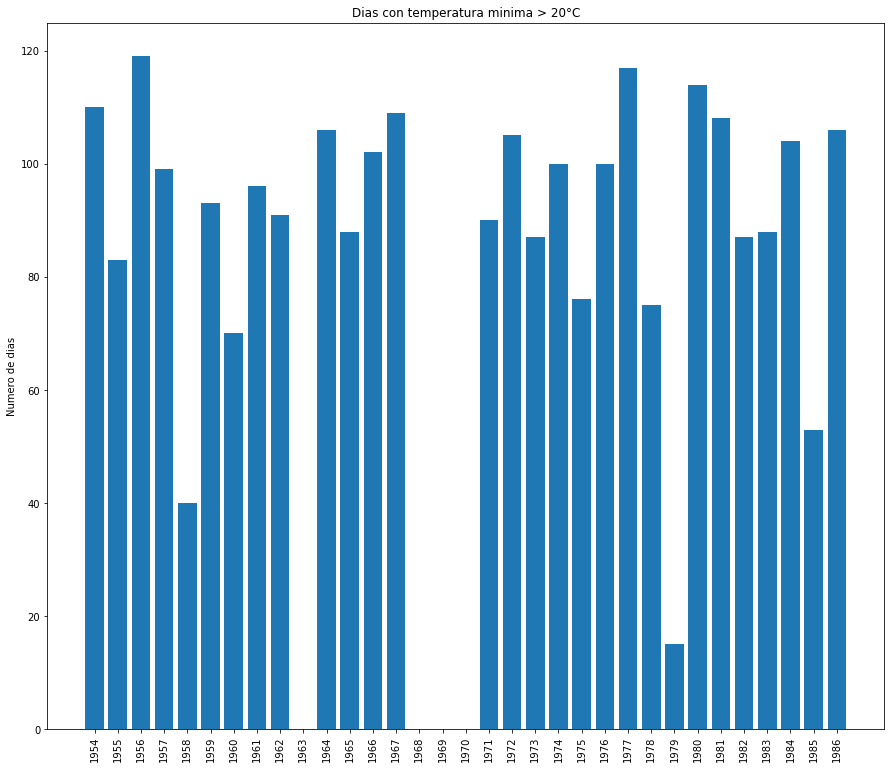

In [16]:
#En la siguiente sección de código obtendremos el número de días donde la temperatura mínima
#Fué menor que 20° C
TR = []
ndias = 0
for i in range(df["AÑO"][0],df["AÑO"][len(df)-1]+1):
    for j in range(0,len(df)):
        if(df["AÑO"][j] == i and df["TMIN"][j] > 20):
            ndias = ndias+1
    TR.append(ndias)
    ndias = 0

#Y graficaremos los datos.
plt.figure(figsize = (15, 13))
plt.bar(np.arange(len(años)),TR)
plt.title("Dias con temperatura minima > 20°C")
plt.ylabel("Numero de dias")
plt.xticks(np.arange(len(años)), range(años[0],años[len(años)-1]+1), rotation = 90)
plt.savefig("9")
plt.show()

